# Модель боевых действий

## Вариант 14

**Инициализация библиотек**

In [17]:
import numpy as np
from math import cos, sin
from scipy.integrate import odeint
import matplotlib.pyplot as plt

**Начальные данные**

In [18]:
x0 = 200000
y0 = 119000
t0 = 0 

tmax = 1
dt = 0.05

t = np.arange(t0,tmax,dt)

v0 = np.array([x0, y0])

**Функция построения графиков**

In [19]:
def army_model(time, data, num):
    title = 'Combat Model #' + num 
    plt.plot(time, data[0], 'steelblue', label='Армия X') 
    plt.plot(time, data[1], 'firebrick', label='Армия Y')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Army size')
    plt.ylim(0, None)
    plt.legend()
    plt.grid(True)
    plt.margins(0.05)
    plt.subplots_adjust(left=0, bottom=0, right=0.8, top=1)

### Модель боевых действий №1

Введём необходимые коэффициенты для модели боевых действий между регулярными войсками.

In [20]:
a = 0.5
b = 0.8
c = 0.7
h = 0.8

Далее, необходимо определить функции $P(t)$ и $Q(t)$, а также необходимую нам функцию для системы дифференциальных уравнений.

In [21]:
# possibility of reinforcement approach for X
def P1(t):
    p = sin(t+5) + 1
    return p

# possibility of reinforcement approach for Y
def Q1(t):
    q = cos(t+3) + 1
    return q

# system of differential equations function
def dy1(y,t):
    dy_1 = -a*y[0] - b*y[1] + P1(t)
    dy_2 = -c*y[0] - h*y[1] + Q1(t)
    return [dy_1, dy_2]

Далее, решим систему дифференциальных уравнений с помощью функции `odeint` и построим модель графически.

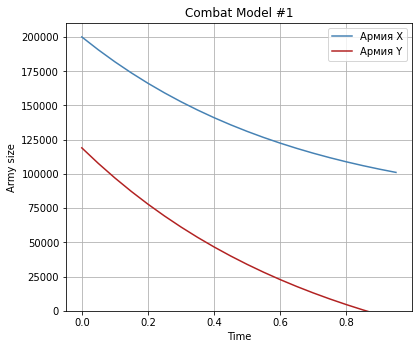

In [22]:
y = odeint(dy1, v0, t)
army_data = [[elem[0] for elem in y], [elem[1] for elem in y]]

army_model(t, army_data, str(1))

### Модель боевых действий №2

Переопределим коэфициенты для модели ведения боевых действий с участием регулярных войск и партизанских отрядов.

In [23]:
a = 0.5
b = 0.8
c = 0.3
h = 0.5

Также переопределим функции `P(t)` и `Q(t)`, модифицируем для данной модели СДУ.

In [26]:
# possibility of reinforcement approach for X
def P2(t):
    p = sin(10*t)
    return p

# possibility of reinforcement approach for Y
def Q2(t):
    q = cos(10*t)
    return q

# system of differential equations function
def dy2(y,t):
    dy_1 = -a*y[0] - b*y[1] + P2(t)
    dy_2 = -c*y[0]*y[1] - h*y[1] + Q2(t)
    return [dy_1, dy_2]

Повторно решим нашу СДУ при новых условиях.

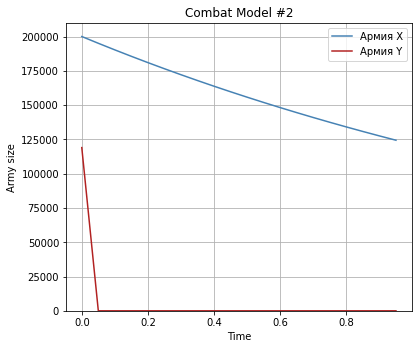

In [25]:
y = odeint(dy2, v0, t)
army_data = [[elem[0] for elem in y], [elem[1] for elem in y]]

army_model(t, army_data, str(2))

##  Выводы

По построенным моделям можно судить, что при участии партизанских отрядов, армия Y будет иметь намного меньше возможностей для сдерживании армии X, но и при их отсутствии она будет сокрушена за отведенный промежуток времени.